In [1]:
import pennylane as qml
from pennylane import numpy as np
from sklearn.datasets import make_moons


import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

from sklearn.svm import SVC

In [2]:
def normalize(x):
    """Переводит значения в интервал от -1 до 1"""

    return 2 * (x - x.min()) / (x.max() - x.min()) - 1

# Файлики

In [3]:
x_samples = []
crimefile1 = open(f"x_axes_0.65.txt", 'r')
x_result = [line.split('], [') for line in crimefile1.readlines()]
x_result[0][0] = x_result[0][0].replace("[[", "")
x_result[0][-1] = x_result[0][-1].replace("]]", "")
for i in range(len(x_result[0])):
    x_result[0][i] = x_result[0][i].split(", ")
    for j in range(len(x_result[0][i])):
        x_result[0][i][j] = float(x_result[0][i][j]) 
    x_samples.append(x_result[0][i])
print(x_samples)
# for element in x_samples:

x_samples = np.array(x_samples)
print(type(x_samples))

y_samples = []
crimefile2 = open("y_axes_0.65.txt", 'r')
y_result = [line.split(', ') for line in crimefile2.readlines()]
type(y_result)
y_result[0][0] = y_result[0][0].replace("[", "")
y_result[0][-1] = y_result[0][-1].replace("]", "")
for i in range(len(y_result[0])):
    y_result[0][i] = int(y_result[0][i])
y_result[0]
y_samples = np.array(y_result[0])
print(type(y_samples))


[[40.050000000000004, 73.60000000000001], [34.826086956521735, 0.0], [0.0, 0.0], [44.5, 0.0], [0.0, 0.0], [0.0, 163.55555555555554], [0.0, 0.0], [0.0, 0.0], [0.0, 92.0], [0.0, 0.0], [66.75, 122.66666666666666], [0.0, 0.0], [0.0, 113.23076923076924], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [72.81818181818183, 0.0], [66.75, 0.0], [53.4, 0.0], [0.0, 0.0], [57.21428571428571, 0.0], [0.0, 0.0], [0.0, 0.0], [94.23529411764706, 0.0], [0.0, 0.0], [133.5, 0.0], [0.0, 122.66666666666666], [0.0, 1472.0], [44.5, 0.0], [0.0, 0.0], [42.1578947368421, 0.0], [0.0, 0.0], [61.61538461538462, 0.0], [0.0, 0.0], [42.1578947368421, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 50.758620689655174], [61.61538461538462, 113.23076923076924], [76.28571428571428, 70.09523809523809], [160.20000000000002, 0.0], [0.0, 113.23076923076924], [0.0, 0.0], [0.0, 133.8181818181818], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0]]
<class 'pennylane.numpy.tensor.tensor'>
<class 'pennylane.numpy.tensor.tensor'>


In [4]:
x_samples[:, 0] = normalize(x_samples[:, 0])  # Нормализуем значения в столбцах
x_samples[:, 1] = normalize(x_samples[:, 1])
print(type(x_samples), x_samples)

<class 'pennylane.numpy.tensor.tensor'> [[-0.5        -0.9       ]
 [-0.56521739 -1.        ]
 [-1.         -1.        ]
 [-0.44444444 -1.        ]
 [-1.         -1.        ]
 [-1.         -0.77777778]
 [-1.         -1.        ]
 [-1.         -1.        ]
 [-1.         -0.875     ]
 [-1.         -1.        ]
 [-0.16666667 -0.83333333]
 [-1.         -1.        ]
 [-1.         -0.84615385]
 [-1.         -1.        ]
 [-1.         -1.        ]
 [-1.         -1.        ]
 [-0.09090909 -1.        ]
 [-0.16666667 -1.        ]
 [-0.33333333 -1.        ]
 [-1.         -1.        ]
 [-0.28571429 -1.        ]
 [-1.         -1.        ]
 [-1.         -1.        ]
 [ 0.17647059 -1.        ]
 [-1.         -1.        ]
 [ 0.66666667 -1.        ]
 [-1.         -0.83333333]
 [-1.          1.        ]
 [-0.44444444 -1.        ]
 [-1.         -1.        ]
 [-0.47368421 -1.        ]
 [-1.         -1.        ]
 [-0.23076923 -1.        ]
 [-1.         -1.        ]
 [-0.47368421 -1.        ]
 [-1.         -

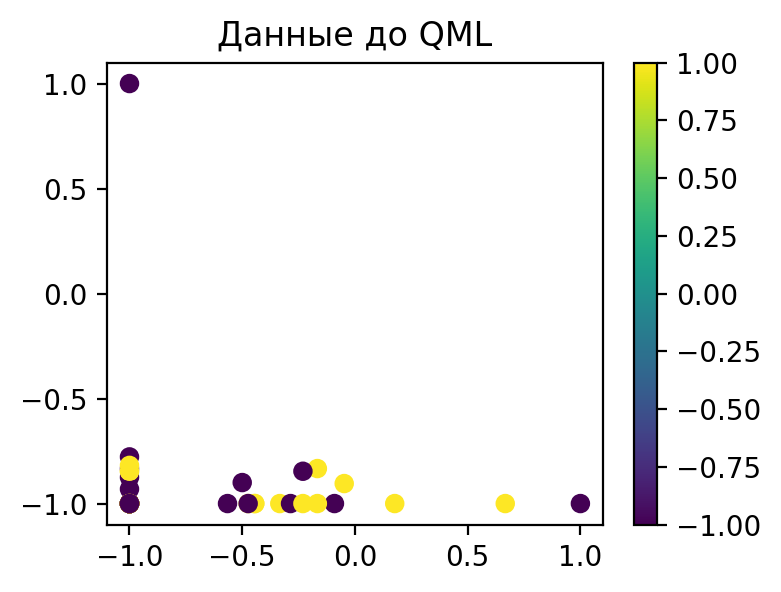

In [5]:
# x_samples[:][0] = normalize(x_samples[:][0])
# x_samples[:][1] = normalize(x_samples[:][1])


plt.figure(figsize=(4, 3))
cb = plt.scatter(x_samples[:, 0], x_samples[:, 1], c=y_samples)
plt.colorbar(cb)
plt.title("Данные до QML")
plt.show()

In [6]:
dev = qml.device("default.qubit", 2)

# Ядро $π * cos(x[0]) * cos(x[1])$ 

In [334]:
# def var_layer(x):
#     qml.Hadamard(wires=0)
#     qml.Hadamard(wires=1)

#     qml.U1(x[0], wires=0)
#     qml.U1(x[1], wires=1)

#     qml.Hadamard(wires=0)
#     qml.Hadamard(wires=1)

#     qml.CNOT(wires=[0, 1])
#     qml.U1(np.pi * np.cos(x[0]) * np.cos(x[1]), wires=1)
#     qml.CNOT(wires=[0, 1])

# Ядро $\exp (\frac{|x_1−x_2|^2}{ 8/\ln(π)})$ 

In [7]:
def var_layer(x):
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)

    qml.U1(x[0], wires=0)
    qml.U1(x[1], wires=1)

    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)

    qml.CNOT(wires=[0, 1])
    qml.U1(np.exp( (np.abs(x[0] - x[1])**2)/(8/np.log(np.pi)) ), wires=1)
    qml.CNOT(wires=[0, 1])

# Ядро $\frac{\pi}{2}(1 - x_1)(1 - x_2)$ 

In [336]:
# def var_layer(x):
#     qml.Hadamard(wires=0)
#     qml.Hadamard(wires=1)

#     qml.U1(x[0], wires=0)
#     qml.U1(x[1], wires=1)

#     qml.Hadamard(wires=0)
#     qml.Hadamard(wires=1)

#     qml.CNOT(wires=[0, 1])
#     qml.U1(np.pi/2 * (1 - x[0]) * (1 - x[1]), wires=1)
#     qml.CNOT(wires=[0, 1])

# Ядро $\frac{\pi}{3 \cos{(x_1)}\cos{(x_2)}}$ 

In [337]:
# def var_layer(x):
#     qml.Hadamard(wires=0)
#     qml.Hadamard(wires=1)

#     qml.U1(x[0], wires=0)
#     qml.U1(x[1], wires=1)

#     qml.Hadamard(wires=0)
#     qml.Hadamard(wires=1)

#     qml.CNOT(wires=[0, 1])
#     qml.U1( np.pi /( 3 * np.cos(x[0]) * np.cos(x[1])), wires=1)
#     qml.CNOT(wires=[0, 1])

In [8]:
@qml.qnode(dev)
def dot_prod(x1, x2):
    var_layer(x1)
    qml.adjoint(var_layer)(x2)

    return qml.probs(wires=[0, 1])

In [9]:
def q_dot_prod(x, i, j):
    x1 = (x[i, 0], x[i, 1])
    x2 = (x[j, 0], x[j, 1])

    return dot_prod(x1, x2)[0]

In [10]:
print(np.allclose(q_dot_prod(x_samples, 0, 1), q_dot_prod(x_samples, 1, 0)))

True


In [11]:
print(qml.draw(dot_prod)(x_samples, y_samples))

0: ──H──U1(M0)──H─╭●─────────╭●─╭●─────────────╭●───H†──U1(-1.00)†──H†─┤ ╭Probs
1: ──H──U1(M1)──H─╰X──U1(M2)─╰X─╰X†──U1(1.00)†─╰X†──H†──U1(-1.00)†──H†─┤ ╰Probs

M0 = 
[-0.5 -0.9]
M1 = 
[-0.56521739 -1.        ]
M2 = 
[1.0006088  1.00143194]


# Прожатие долгое

In [14]:
gram_mat = np.zeros((x_samples.shape[0], x_samples.shape[0]))

for i in range(x_samples.shape[0]):
    for j in range(x_samples.shape[0]):
        if i == j:
            gram_mat[i, j] = 1
        if i > j:
            r = q_dot_prod(x_samples, i, j)
            gram_mat[i, j] = r
            gram_mat[j, i] = r

In [15]:
model = SVC(kernel="precomputed")
model.fit(gram_mat, y_samples)

SVC(kernel='precomputed')

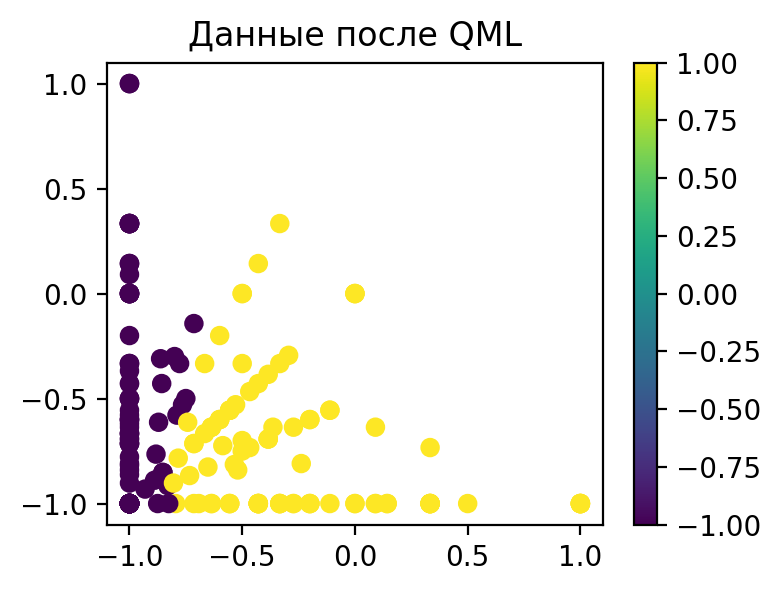

In [344]:
preds = model.predict(X=gram_mat)

plt.figure(figsize=(4, 3))
cb = plt.scatter(x_samples[:, 0], x_samples[:, 1], c=preds)
plt.colorbar(cb)
plt.title("Данные после QML")
plt.show()

In [345]:
print(gram_mat)

[[1.         0.75883715 0.42372    ... 0.90816556 0.93117311 0.97681369]
 [0.75883715 1.         0.74753427 ... 0.66949092 0.84952505 0.80516149]
 [0.42372    0.74753427 1.         ... 0.40886233 0.57631335 0.44982702]
 ...
 [0.90816556 0.66949092 0.40886233 ... 1.         0.9522544  0.80998941]
 [0.93117311 0.84952505 0.57631335 ... 0.9522544  1.         0.88196493]
 [0.97681369 0.80516149 0.44982702 ... 0.80998941 0.88196493 1.        ]]


In [346]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_samples, preds))

0.6952380952380952


# Ядро $π * cos(x[0]) * cos(x[1])$ 

## Для 65% совпадения комментарий-словарь - 

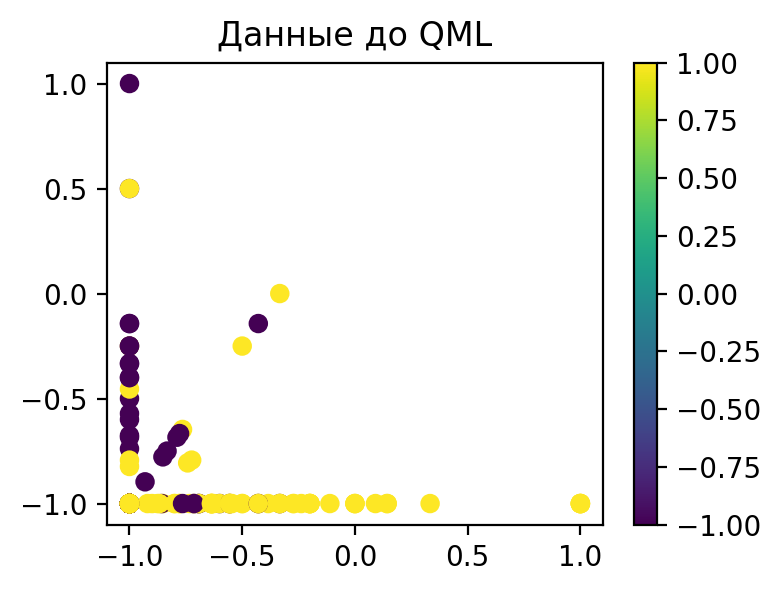

In [29]:
# x_samples[:][0] = normalize(x_samples[:][0])
# x_samples[:][1] = normalize(x_samples[:][1])


plt.figure(figsize=(4, 3))
cb = plt.scatter(x_samples[:, 0], x_samples[:, 1], c=y_samples)
plt.colorbar(cb)
plt.title("Данные до QML")
plt.show()

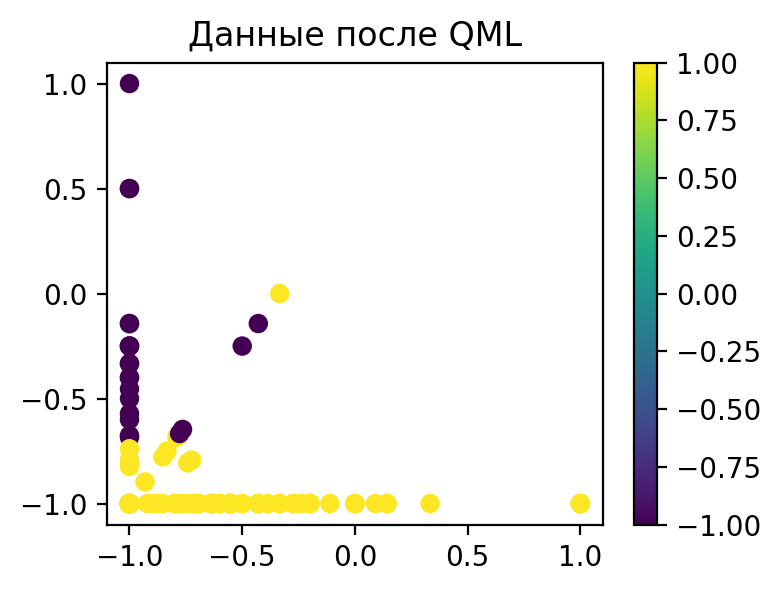

In [30]:
preds = model.predict(X=gram_mat)

plt.figure(figsize=(4, 3))
cb = plt.scatter(x_samples[:, 0], x_samples[:, 1], c=preds)
plt.colorbar(cb)
plt.title("Данные после QML")
plt.show()

In [ ]:
print(gram_mat)

[[1.         0.95174914 0.94474877 ... 0.92974866 0.9343869  0.99165113]
 [0.95174914 1.         0.81214328 ... 0.84835203 0.92164686 0.98280596]
 [0.94474877 0.81214328 1.         ... 0.90318733 0.830116   0.89733286]
 ...
 [0.92974866 0.84835203 0.90318733 ... 1.         0.96583497 0.90836767]
 [0.9343869  0.92164686 0.830116   ... 0.96583497 1.         0.94355778]
 [0.99165113 0.98280596 0.89733286 ... 0.90836767 0.94355778 1.        ]]


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_samples, preds))
#63+-

0.6333333333333333


## Для 45% совпадения комментарий-словарь - 

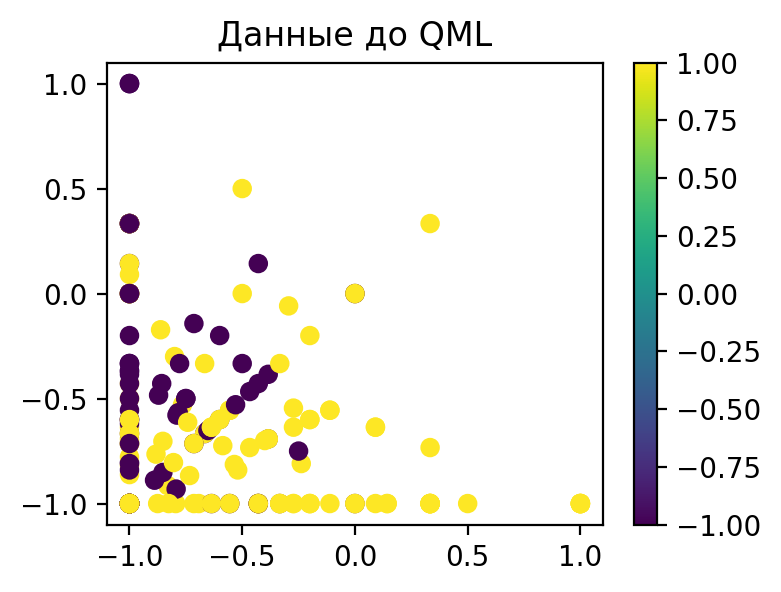

In [46]:
# x_samples[:][0] = normalize(x_samples[:][0])
# x_samples[:][1] = normalize(x_samples[:][1])


plt.figure(figsize=(4, 3))
cb = plt.scatter(x_samples[:, 0], x_samples[:, 1], c=y_samples)
plt.colorbar(cb)
plt.title("Данные до QML")
plt.show()

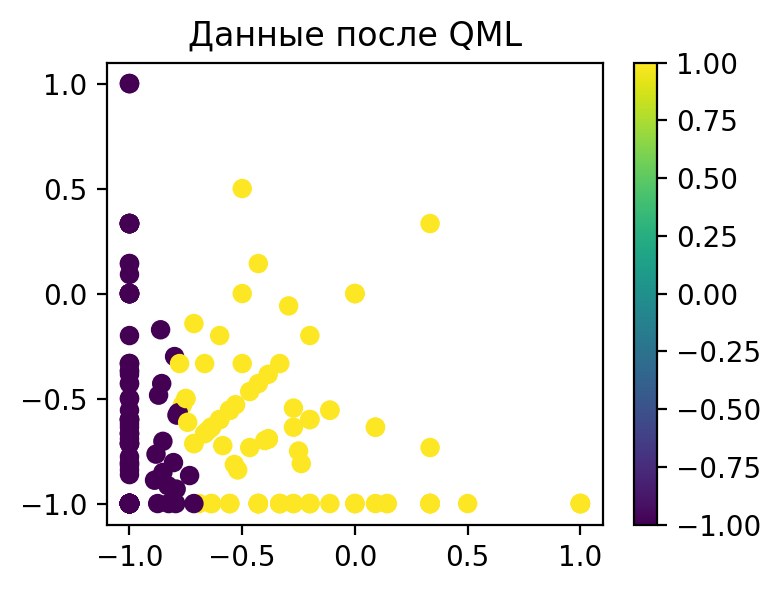

In [47]:
preds = model.predict(X=gram_mat)

plt.figure(figsize=(4, 3))
cb = plt.scatter(x_samples[:, 0], x_samples[:, 1], c=preds)
plt.colorbar(cb)
plt.title("Данные после QML")
plt.show()

In [ ]:
print(gram_mat)

[[1.         0.68891463 0.46697921 ... 0.78821112 0.92959344 0.96193398]
 [0.68891463 1.         0.55149876 ... 0.65246891 0.67967085 0.77670433]
 [0.46697921 0.55149876 1.         ... 0.42379809 0.52886749 0.57266109]
 ...
 [0.78821112 0.65246891 0.42379809 ... 1.         0.84528458 0.67304818]
 [0.92959344 0.67967085 0.52886749 ... 0.84528458 1.         0.86662579]
 [0.96193398 0.77670433 0.57266109 ... 0.67304818 0.86662579 1.        ]]


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_samples, preds))

0.6666666666666666


## Для 20% совпадения комментарий-словарь - 

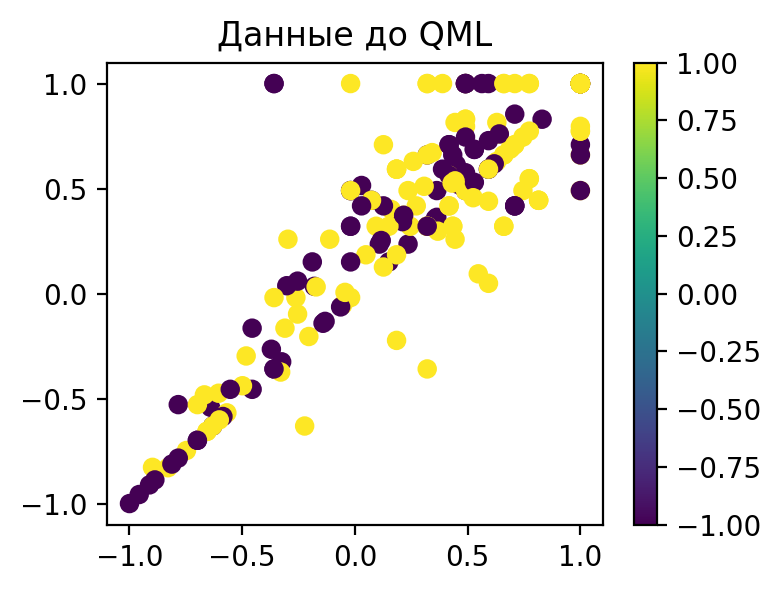

In [63]:
# x_samples[:][0] = normalize(x_samples[:][0])
# x_samples[:][1] = normalize(x_samples[:][1])


plt.figure(figsize=(4, 3))
cb = plt.scatter(x_samples[:, 0], x_samples[:, 1], c=y_samples)
plt.colorbar(cb)
plt.title("Данные до QML")
plt.show()

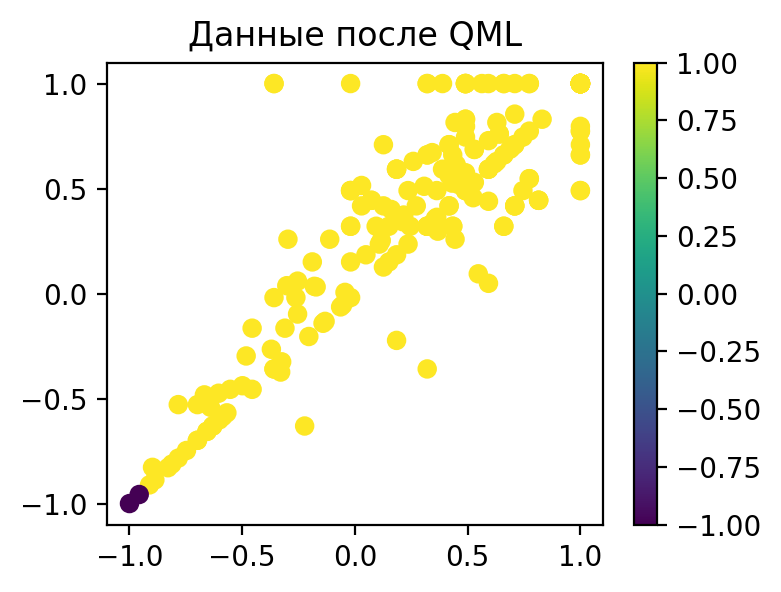

In [64]:
preds = model.predict(X=gram_mat)

plt.figure(figsize=(4, 3))
cb = plt.scatter(x_samples[:, 0], x_samples[:, 1], c=preds)
plt.colorbar(cb)
plt.title("Данные после QML")
plt.show()

In [65]:
print(gram_mat)

[[1.         0.8599518  0.88823213 ... 0.97333651 0.9944616  0.82439193]
 [0.8599518  1.         0.6667945  ... 0.85719821 0.81217999 0.99349151]
 [0.88823213 0.6667945  1.         ... 0.85880842 0.925032   0.62847222]
 ...
 [0.97333651 0.85719821 0.85880842 ... 1.         0.96626331 0.80758942]
 [0.9944616  0.81217999 0.925032   ... 0.96626331 1.         0.77259599]
 [0.82439193 0.99349151 0.62847222 ... 0.80758942 0.77259599 1.        ]]


In [66]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_samples, preds))

0.5857142857142857


## Для 80% совпадения комментарий-словарь - 

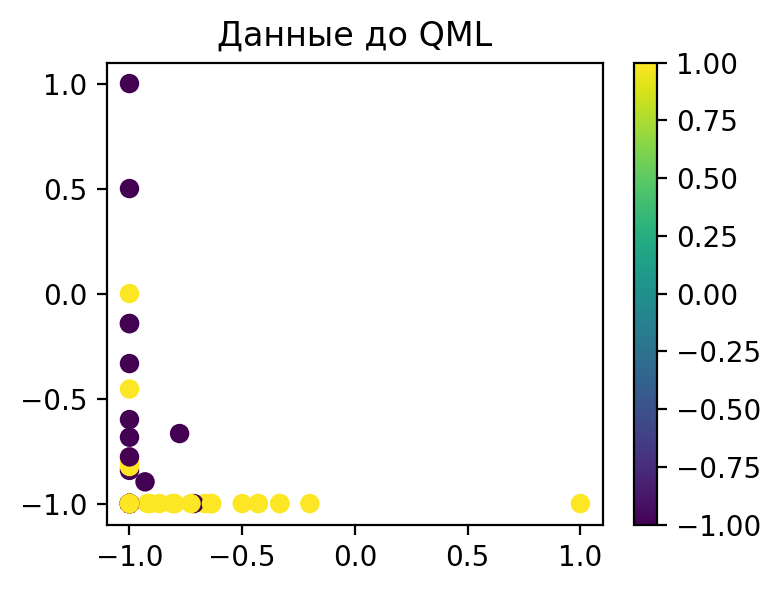

In [81]:
# x_samples[:][0] = normalize(x_samples[:][0])
# x_samples[:][1] = normalize(x_samples[:][1])


plt.figure(figsize=(4, 3))
cb = plt.scatter(x_samples[:, 0], x_samples[:, 1], c=y_samples)
plt.colorbar(cb)
plt.title("Данные до QML")
plt.show()

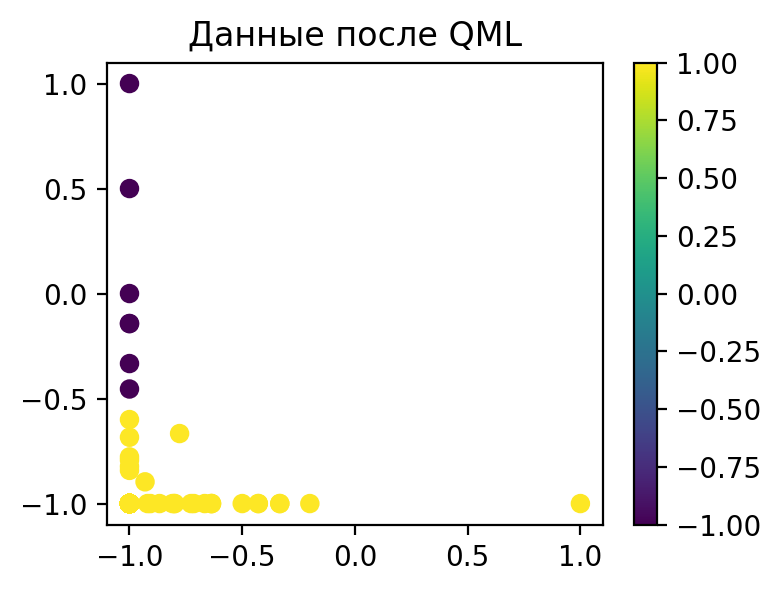

In [82]:
preds = model.predict(X=gram_mat)

plt.figure(figsize=(4, 3))
cb = plt.scatter(x_samples[:, 0], x_samples[:, 1], c=preds)
plt.colorbar(cb)
plt.title("Данные после QML")
plt.show()

In [83]:
print(gram_mat)

[[1.       1.       1.       ... 1.       0.830116 1.      ]
 [1.       1.       1.       ... 1.       0.830116 1.      ]
 [1.       1.       1.       ... 1.       0.830116 1.      ]
 ...
 [1.       1.       1.       ... 1.       0.830116 1.      ]
 [0.830116 0.830116 0.830116 ... 0.830116 1.       0.830116]
 [1.       1.       1.       ... 1.       0.830116 1.      ]]


In [84]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_samples, preds))

0.5904761904761905


# Ядро $\exp (\frac{|x_1−x_2|^2}{ 8/\ln(π)})$ 

## Для 20% совпадения комментарий-словарь - 

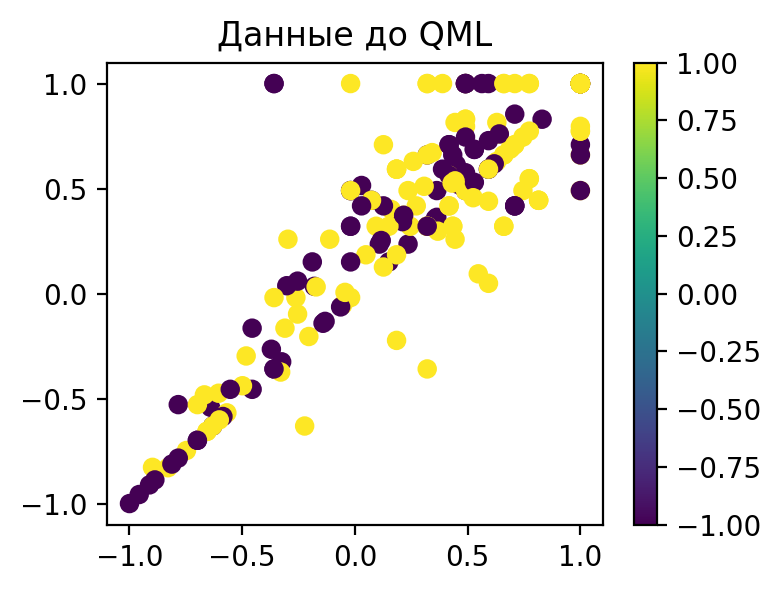

In [100]:
# x_samples[:][0] = normalize(x_samples[:][0])
# x_samples[:][1] = normalize(x_samples[:][1])


plt.figure(figsize=(4, 3))
cb = plt.scatter(x_samples[:, 0], x_samples[:, 1], c=y_samples)
plt.colorbar(cb)
plt.title("Данные до QML")
plt.show()

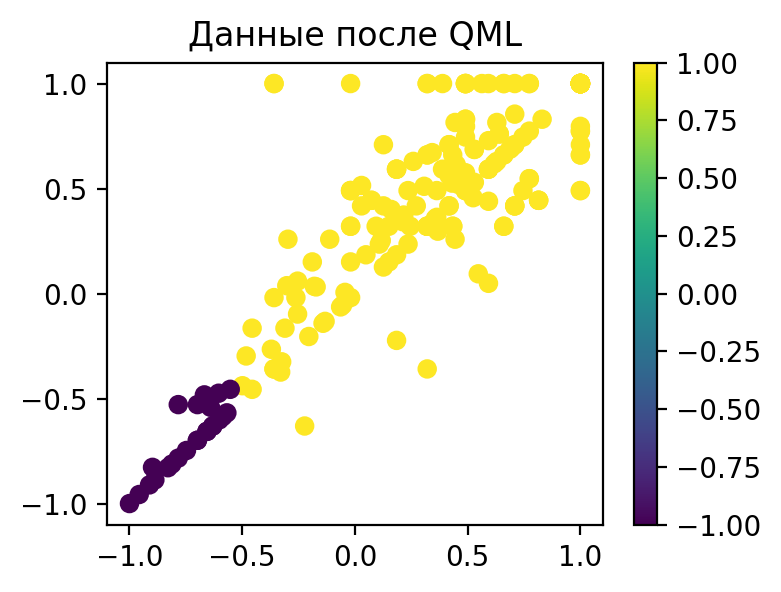

In [105]:
# gram_mat_exp_02 = gram_mat
preds_exp_02 = model.predict(X=gram_mat_exp_02)

plt.figure(figsize=(4, 3))
cb = plt.scatter(x_samples[:, 0], x_samples[:, 1], c=preds_exp_02)
plt.colorbar(cb)
plt.title("Данные после QML")
plt.show()

In [106]:

print(gram_mat_exp_02)

[[1.         0.94550181 0.91762085 ... 0.97417136 0.99753389 0.94389486]
 [0.94550181 1.         0.75650315 ... 0.96460342 0.92194997 0.99677924]
 [0.91762085 0.75650315 1.         ... 0.87206366 0.94267467 0.74678646]
 ...
 [0.97417136 0.96460342 0.87206366 ... 1.         0.96683059 0.94826745]
 [0.99753389 0.92194997 0.94267467 ... 0.96683059 1.         0.9190093 ]
 [0.94389486 0.99677924 0.74678646 ... 0.94826745 0.9190093  1.        ]]


In [107]:
# y_samples_exp_02 = y_samples
from sklearn.metrics import accuracy_score
print(accuracy_score(y_samples_exp_02, preds_exp_02))

0.5857142857142857


## Для 35% совпадения комментарий-словарь - 

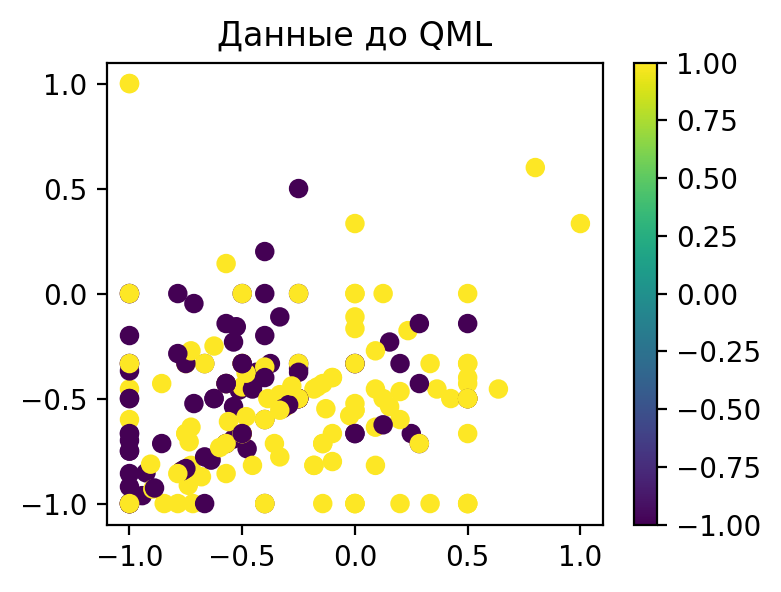

In [326]:
# x_samples[:][0] = normalize(x_samples[:][0])
# x_samples[:][1] = normalize(x_samples[:][1])


plt.figure(figsize=(4, 3))
cb = plt.scatter(x_samples[:, 0], x_samples[:, 1], c=y_samples)
plt.colorbar(cb)
plt.title("Данные до QML")
plt.show()

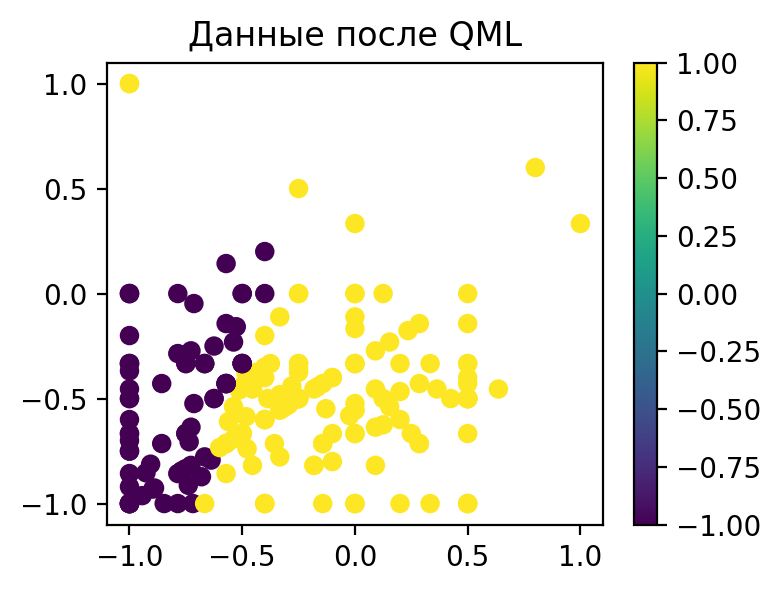

In [327]:
gram_mat_exp_35 = gram_mat
preds_exp_35 = model.predict(X=gram_mat_exp_35)

plt.figure(figsize=(4, 3))
cb = plt.scatter(x_samples[:, 0], x_samples[:, 1], c=preds_exp_35)
plt.colorbar(cb)
plt.title("Данные после QML")
plt.show()

In [328]:

print(gram_mat_exp_35)

[[1.         0.98091815 0.94705815 ... 0.79447437 0.85493732 0.96809142]
 [0.98091815 1.         0.98445621 ... 0.83614259 0.83828769 0.92480378]
 [0.94705815 0.98445621 1.         ... 0.91107    0.87906324 0.91042883]
 ...
 [0.79447437 0.83614259 0.91107    ... 1.         0.94449696 0.83799754]
 [0.85493732 0.83828769 0.87906324 ... 0.94449696 1.         0.93576703]
 [0.96809142 0.92480378 0.91042883 ... 0.83799754 0.93576703 1.        ]]


In [329]:
y_samples_exp_35 = y_samples
from sklearn.metrics import accuracy_score
print(accuracy_score(y_samples_exp_35, preds_exp_35))

0.6476190476190476


## Для 45% совпадения комментарий-словарь - 

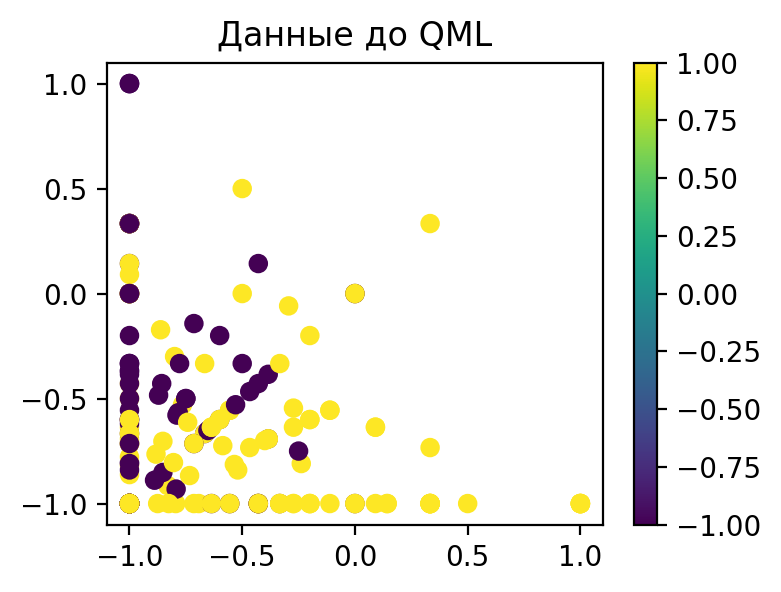

In [123]:
# x_samples[:][0] = normalize(x_samples[:][0])
# x_samples[:][1] = normalize(x_samples[:][1])


plt.figure(figsize=(4, 3))
cb = plt.scatter(x_samples[:, 0], x_samples[:, 1], c=y_samples)
plt.colorbar(cb)
plt.title("Данные до QML")
plt.show()

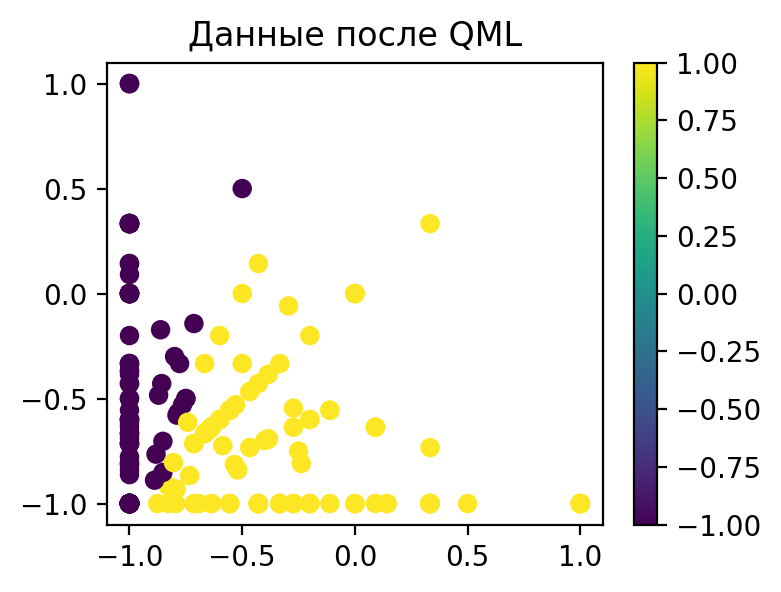

In [124]:
gram_mat_exp_45 = gram_mat
preds_exp_45 = model.predict(X=gram_mat_exp_45)

plt.figure(figsize=(4, 3))
cb = plt.scatter(x_samples[:, 0], x_samples[:, 1], c=preds_exp_45)
plt.colorbar(cb)
plt.title("Данные после QML")
plt.show()

In [125]:

print(gram_mat_exp_45)

[[1.         0.66557847 0.42372    ... 0.90816556 0.93117311 0.97681369]
 [0.66557847 1.         0.55149876 ... 0.46311508 0.64461924 0.77558318]
 [0.42372    0.55149876 1.         ... 0.40886233 0.57631335 0.44982702]
 ...
 [0.90816556 0.46311508 0.40886233 ... 1.         0.9522544  0.80998941]
 [0.93117311 0.64461924 0.57631335 ... 0.9522544  1.         0.88196493]
 [0.97681369 0.77558318 0.44982702 ... 0.80998941 0.88196493 1.        ]]


In [126]:
y_samples_exp_45 = y_samples
from sklearn.metrics import accuracy_score
print(accuracy_score(y_samples_exp_45, preds_exp_45))

0.7047619047619048


## Для 50% совпадения комментарий-словарь - 

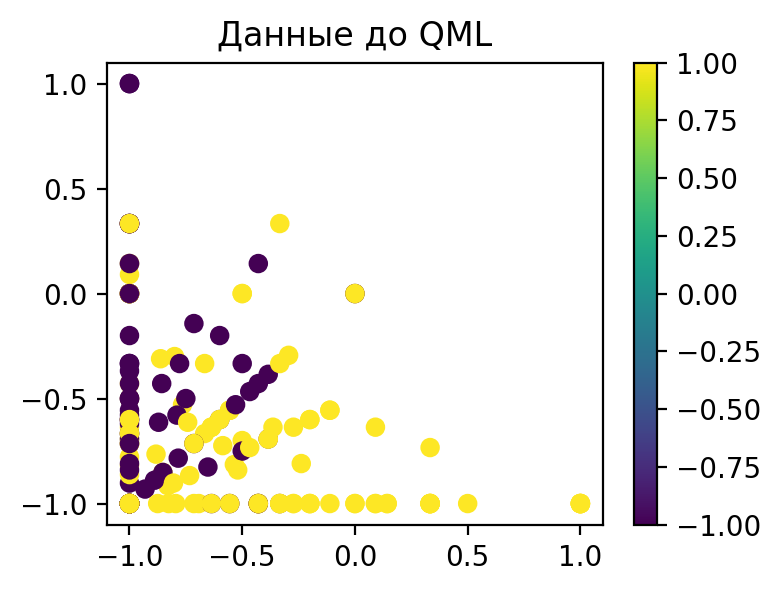

In [347]:
# x_samples[:][0] = normalize(x_samples[:][0])
# x_samples[:][1] = normalize(x_samples[:][1])


plt.figure(figsize=(4, 3))
cb = plt.scatter(x_samples[:, 0], x_samples[:, 1], c=y_samples)
plt.colorbar(cb)
plt.title("Данные до QML")
plt.show()

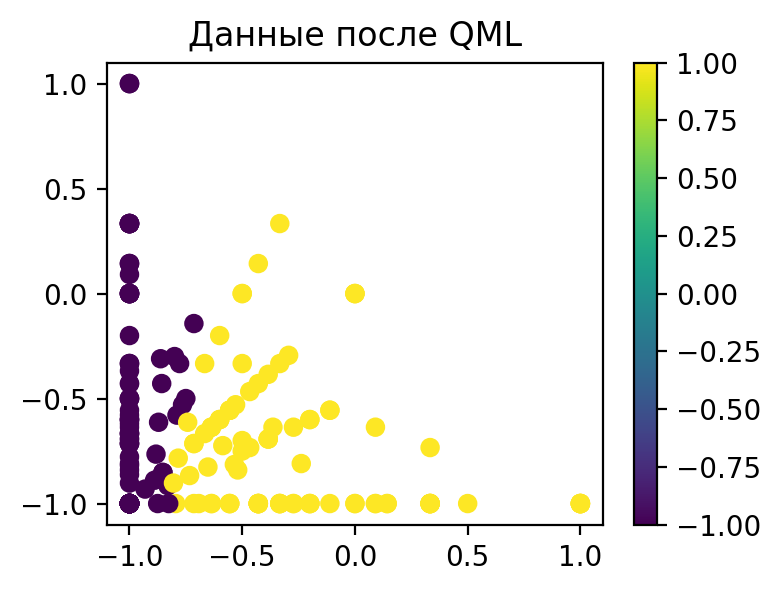

In [348]:
gram_mat_exp_05 = gram_mat
preds_exp_05 = model.predict(X=gram_mat_exp_05)

plt.figure(figsize=(4, 3))
cb = plt.scatter(x_samples[:, 0], x_samples[:, 1], c=preds_exp_05)
plt.colorbar(cb)
plt.title("Данные после QML")
plt.show()

In [349]:

print(gram_mat_exp_05)

[[1.         0.75883715 0.42372    ... 0.90816556 0.93117311 0.97681369]
 [0.75883715 1.         0.74753427 ... 0.66949092 0.84952505 0.80516149]
 [0.42372    0.74753427 1.         ... 0.40886233 0.57631335 0.44982702]
 ...
 [0.90816556 0.66949092 0.40886233 ... 1.         0.9522544  0.80998941]
 [0.93117311 0.84952505 0.57631335 ... 0.9522544  1.         0.88196493]
 [0.97681369 0.80516149 0.44982702 ... 0.80998941 0.88196493 1.        ]]


In [350]:
y_samples_exp_05 = y_samples
from sklearn.metrics import accuracy_score
print(accuracy_score(y_samples_exp_05, preds_exp_05))

0.6952380952380952


## Для 65% совпадения комментарий-словарь - 

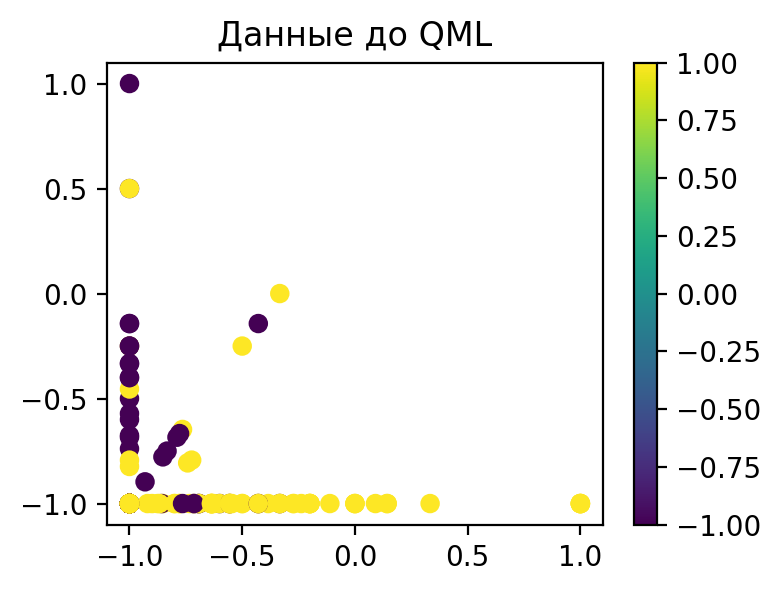

In [142]:
# x_samples[:][0] = normalize(x_samples[:][0])
# x_samples[:][1] = normalize(x_samples[:][1])


plt.figure(figsize=(4, 3))
cb = plt.scatter(x_samples[:, 0], x_samples[:, 1], c=y_samples)
plt.colorbar(cb)
plt.title("Данные до QML")
plt.show()

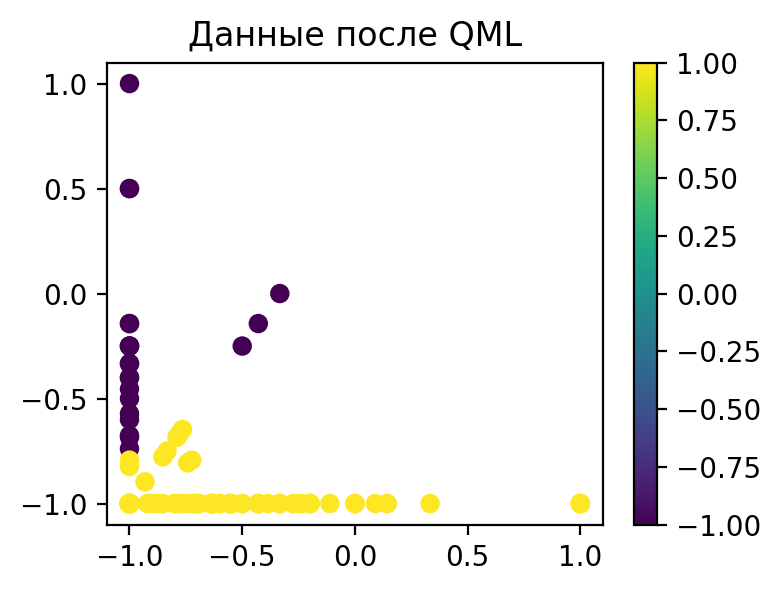

In [145]:
gram_mat_exp_65 = gram_mat
preds_exp_65 = model.predict(X=gram_mat_exp_65)

plt.figure(figsize=(4, 3))
cb = plt.scatter(x_samples[:, 0], x_samples[:, 1], c=preds_exp_65)
plt.colorbar(cb)
plt.title("Данные после QML")
plt.show()

In [146]:

print(gram_mat_exp_65)

[[1.         0.96762388 0.97647806 ... 0.93232948 0.9706781  0.99528665]
 [0.96762388 1.         0.89217577 ... 0.85235773 0.92462917 0.98744856]
 [0.97647806 0.89217577 1.         ... 0.95463677 0.96052128 0.95125981]
 ...
 [0.93232948 0.85235773 0.95463677 ... 1.         0.98535548 0.90840089]
 [0.9706781  0.92462917 0.96052128 ... 0.98535548 1.         0.96039865]
 [0.99528665 0.98744856 0.95125981 ... 0.90840089 0.96039865 1.        ]]


In [147]:
y_samples_exp_65 = y_samples
from sklearn.metrics import accuracy_score
print(accuracy_score(y_samples_exp_65, preds_exp_65))

0.6333333333333333


## Для 80% совпадения комментарий-словарь - 

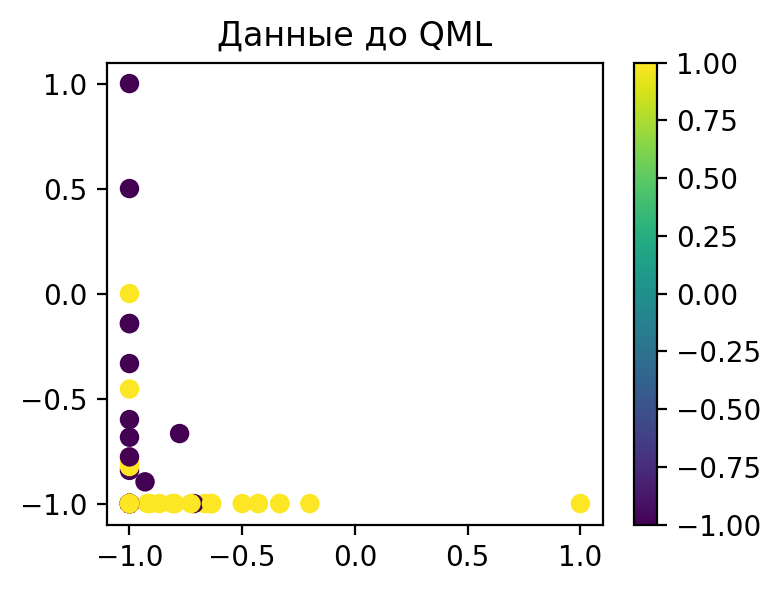

In [163]:
# x_samples[:][0] = normalize(x_samples[:][0])
# x_samples[:][1] = normalize(x_samples[:][1])


plt.figure(figsize=(4, 3))
cb = plt.scatter(x_samples[:, 0], x_samples[:, 1], c=y_samples)
plt.colorbar(cb)
plt.title("Данные до QML")
plt.show()

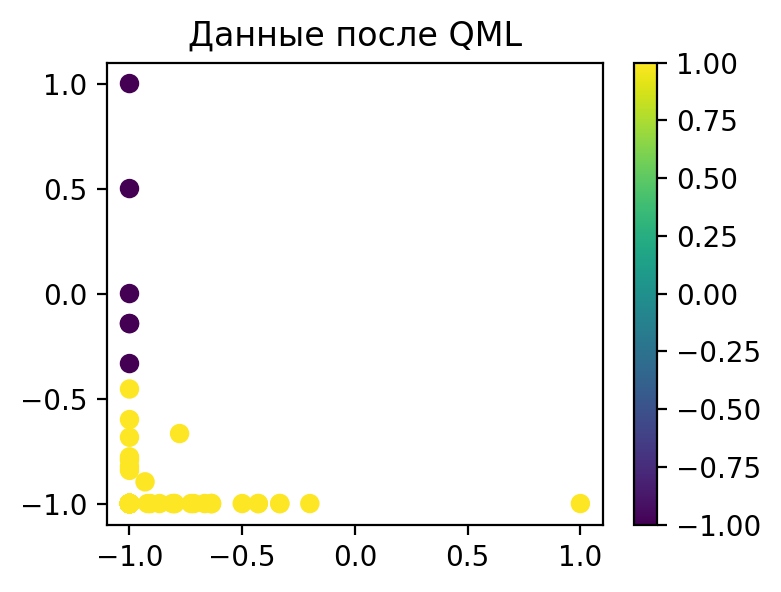

In [164]:
gram_mat_exp_08 = gram_mat
preds_exp_08 = model.predict(X=gram_mat_exp_08)

plt.figure(figsize=(4, 3))
cb = plt.scatter(x_samples[:, 0], x_samples[:, 1], c=preds_exp_08)
plt.colorbar(cb)
plt.title("Данные после QML")
plt.show()

In [165]:

print(gram_mat_exp_08)

[[1.         1.         1.         ... 1.         0.96052128 1.        ]
 [1.         1.         1.         ... 1.         0.96052128 1.        ]
 [1.         1.         1.         ... 1.         0.96052128 1.        ]
 ...
 [1.         1.         1.         ... 1.         0.96052128 1.        ]
 [0.96052128 0.96052128 0.96052128 ... 0.96052128 1.         0.96052128]
 [1.         1.         1.         ... 1.         0.96052128 1.        ]]


In [166]:
y_samples_exp_08 = y_samples
from sklearn.metrics import accuracy_score
print(accuracy_score(y_samples_exp_08, preds_exp_08))

0.5952380952380952


# Ядро $\frac{\pi}{2}(1 - x_1)(1 - x_2)$ 

## Для 20% совпадения комментарий-словарь - 

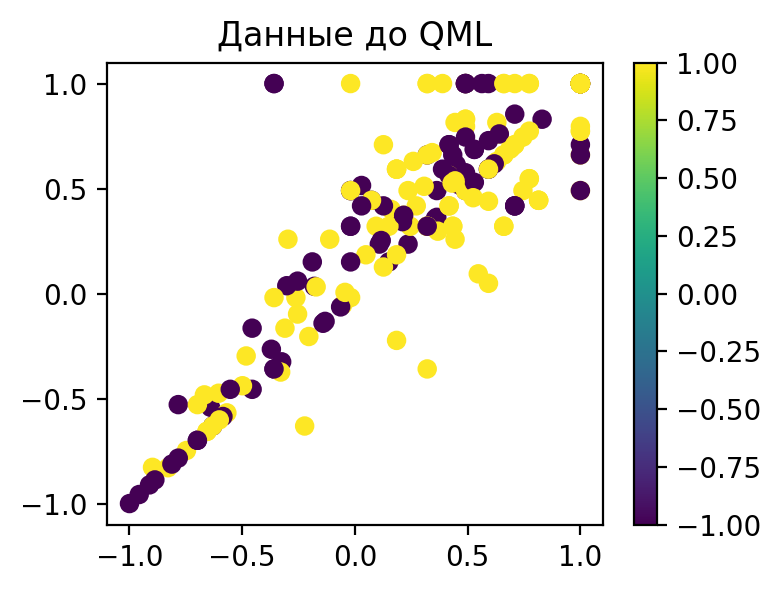

In [184]:
# x_samples[:][0] = normalize(x_samples[:][0])
# x_samples[:][1] = normalize(x_samples[:][1])


plt.figure(figsize=(4, 3))
cb = plt.scatter(x_samples[:, 0], x_samples[:, 1], c=y_samples)
plt.colorbar(cb)
plt.title("Данные до QML")
plt.show()

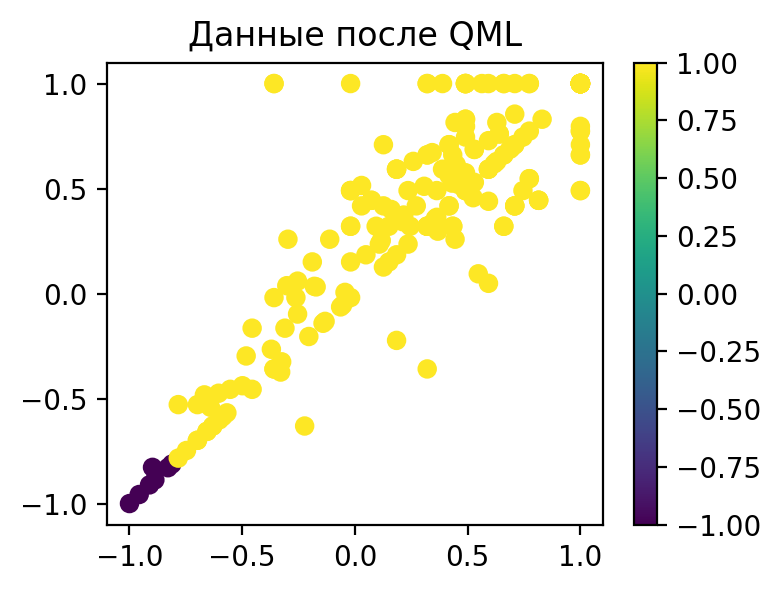

In [ ]:
gram_mat_pi_2_02 = gram_mat
preds_pi_2_02 = model.predict(X=gram_mat_pi_2_02)

plt.figure(figsize=(4, 3))
cb = plt.scatter(x_samples[:, 0], x_samples[:, 1], c=preds_pi_2_02)
plt.colorbar(cb)
plt.title("Данные после QML")
plt.show()

In [ ]:

print(gram_mat_pi_2_02)

[[1.         0.93714393 0.89532755 ... 0.97403232 0.99689388 0.93514591]
 [0.93714393 1.         0.72367612 ... 0.9531945  0.9091067  0.99679716]
 [0.89532755 0.72367612 1.         ... 0.86055736 0.92540272 0.70903737]
 ...
 [0.97403232 0.9531945  0.86055736 ... 1.         0.9666907  0.93675716]
 [0.99689388 0.9091067  0.92540272 ... 0.9666907  1.         0.90550566]
 [0.93514591 0.99679716 0.70903737 ... 0.93675716 0.90550566 1.        ]]


In [ ]:
y_samples_pi_2_02 = y_samples
from sklearn.metrics import accuracy_score
print(accuracy_score(y_samples_pi_2_02, preds_pi_2_02))

0.5904761904761905


## Для 45% совпадения комментарий-словарь - 

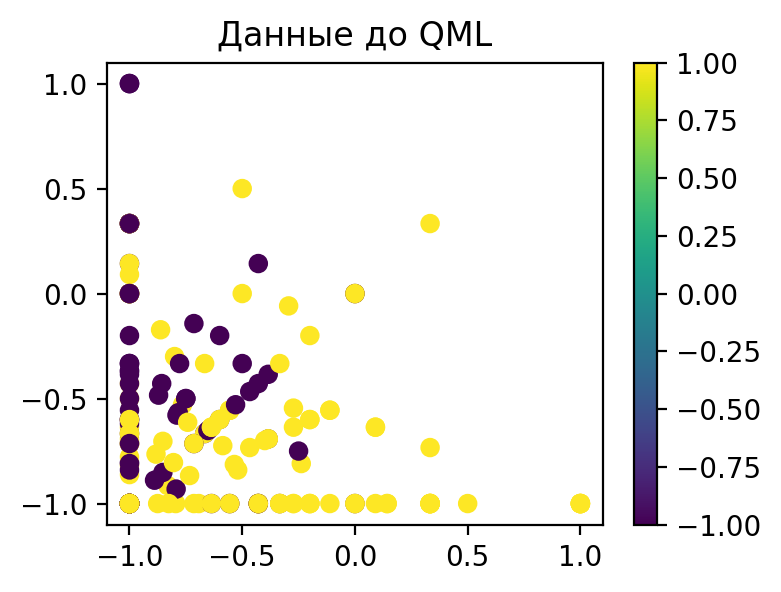

In [204]:
# x_samples[:][0] = normalize(x_samples[:][0])
# x_samples[:][1] = normalize(x_samples[:][1])


plt.figure(figsize=(4, 3))
cb = plt.scatter(x_samples[:, 0], x_samples[:, 1], c=y_samples)
plt.colorbar(cb)
plt.title("Данные до QML")
plt.show()

In [205]:
gram_mat_pi_2_45 = gram_mat
preds_pi_2_45 = model.predict(X=gram_mat_pi_2_45)

plt.figure(figsize=(4, 3))
cb = plt.scatter(x_samples[:, 0], x_samples[:, 1], c=preds_pi_2_45)
plt.colorbar(cb)
plt.title("Данные после QML")
plt.show()

In [206]:

print(gram_mat_pi_2_45)

[[1.         0.96558721 0.56590686 ... 0.5887679  0.93101319 0.89969499]
 [0.96558721 1.         0.55149876 ... 0.66697808 0.95038737 0.91869441]
 [0.56590686 0.55149876 1.         ... 0.40167641 0.37571936 0.67453486]
 ...
 [0.5887679  0.66697808 0.40167641 ... 1.         0.59520845 0.48652625]
 [0.93101319 0.95038737 0.37571936 ... 0.59520845 1.         0.83119723]
 [0.89969499 0.91869441 0.67453486 ... 0.48652625 0.83119723 1.        ]]


In [207]:
y_samples_pi_2_45 = y_samples
from sklearn.metrics import accuracy_score
print(accuracy_score(y_samples_pi_2_45, preds_pi_2_45))

0.6


## Для 65% совпадения комментарий-словарь - 

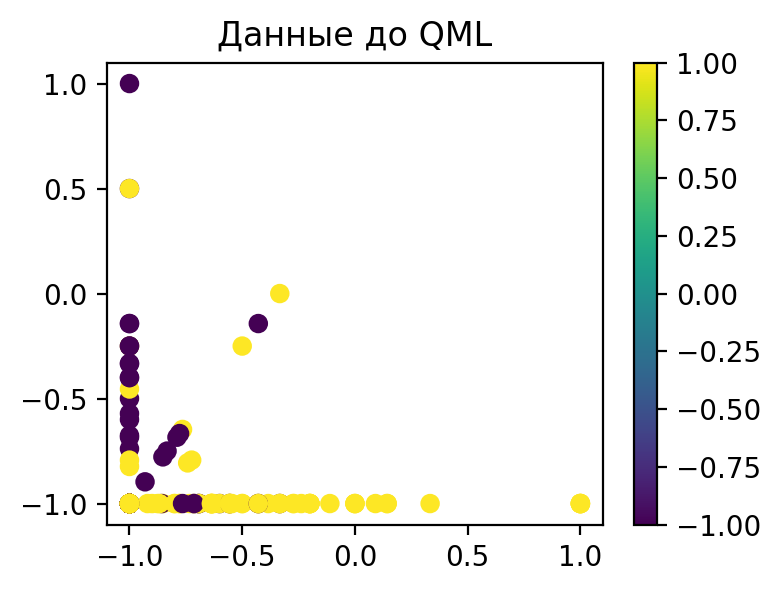

In [224]:
# x_samples[:][0] = normalize(x_samples[:][0])
# x_samples[:][1] = normalize(x_samples[:][1])


plt.figure(figsize=(4, 3))
cb = plt.scatter(x_samples[:, 0], x_samples[:, 1], c=y_samples)
plt.colorbar(cb)
plt.title("Данные до QML")
plt.show()

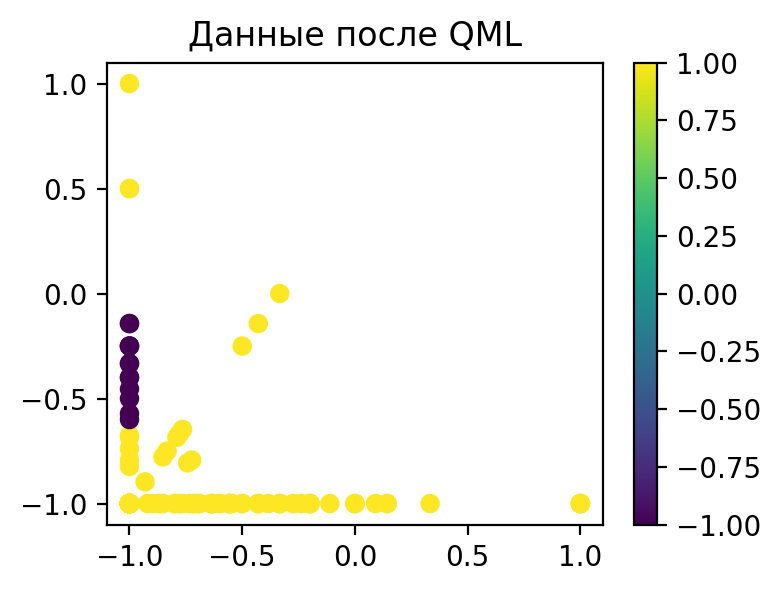

In [225]:
gram_mat_pi_2_65 = gram_mat
preds_pi_2_65 = model.predict(X=gram_mat_pi_2_65)

plt.figure(figsize=(4, 3))
cb = plt.scatter(x_samples[:, 0], x_samples[:, 1], c=preds_pi_2_65)
plt.colorbar(cb)
plt.title("Данные после QML")
plt.show()

In [226]:

print(gram_mat_pi_2_65)

[[1.         0.75489513 0.79332366 ... 0.90696822 0.89438424 0.95884325]
 [0.75489513 1.         0.35846041 ... 0.77996156 0.89338996 0.90000157]
 [0.79332366 0.35846041 1.         ... 0.6403252  0.54736316 0.61954664]
 ...
 [0.90696822 0.77996156 0.6403252  ... 1.         0.97115032 0.90799462]
 [0.89438424 0.89338996 0.54736316 ... 0.97115032 1.         0.95133999]
 [0.95884325 0.90000157 0.61954664 ... 0.90799462 0.95133999 1.        ]]


In [227]:
y_samples_pi_2_65 = y_samples
from sklearn.metrics import accuracy_score
print(accuracy_score(y_samples_pi_2_65, preds_pi_2_65))

0.6190476190476191


## Для 80% совпадения комментарий-словарь - 

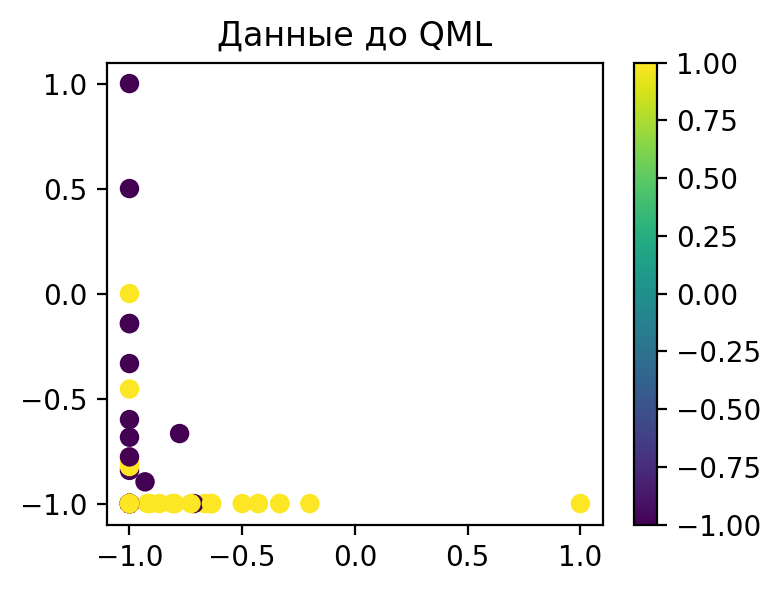

In [244]:
# x_samples[:][0] = normalize(x_samples[:][0])
# x_samples[:][1] = normalize(x_samples[:][1])


plt.figure(figsize=(4, 3))
cb = plt.scatter(x_samples[:, 0], x_samples[:, 1], c=y_samples)
plt.colorbar(cb)
plt.title("Данные до QML")
plt.show()

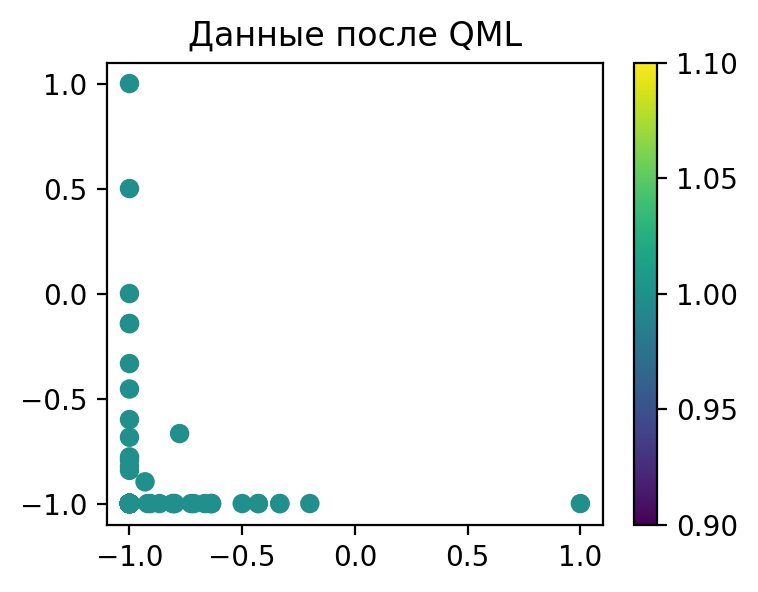

In [245]:
gram_mat_pi_2_08 = gram_mat
preds_pi_2_08 = model.predict(X=gram_mat_pi_2_08)

plt.figure(figsize=(4, 3))
cb = plt.scatter(x_samples[:, 0], x_samples[:, 1], c=preds_pi_2_08)
plt.colorbar(cb)
plt.title("Данные после QML")
plt.show()

In [246]:

print(gram_mat_pi_2_08)

[[1.         1.         1.         ... 1.         0.54736316 1.        ]
 [1.         1.         1.         ... 1.         0.54736316 1.        ]
 [1.         1.         1.         ... 1.         0.54736316 1.        ]
 ...
 [1.         1.         1.         ... 1.         0.54736316 1.        ]
 [0.54736316 0.54736316 0.54736316 ... 0.54736316 1.         0.54736316]
 [1.         1.         1.         ... 1.         0.54736316 1.        ]]


In [247]:
y_samples_pi_2_08 = y_samples
from sklearn.metrics import accuracy_score
print(accuracy_score(y_samples_pi_2_08, preds_pi_2_08))

0.5761904761904761


# Ядро $\frac{\pi}{3 \cos{(x_1)}\cos{(x_2)}}$ 

## Для 20% совпадения комментарий-словарь - 

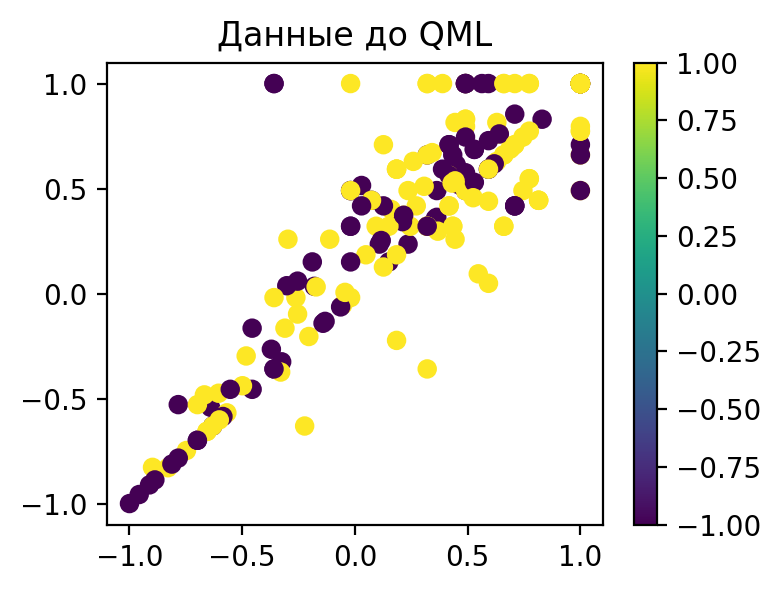

In [266]:
# x_samples[:][0] = normalize(x_samples[:][0])
# x_samples[:][1] = normalize(x_samples[:][1])


plt.figure(figsize=(4, 3))
cb = plt.scatter(x_samples[:, 0], x_samples[:, 1], c=y_samples)
plt.colorbar(cb)
plt.title("Данные до QML")
plt.show()

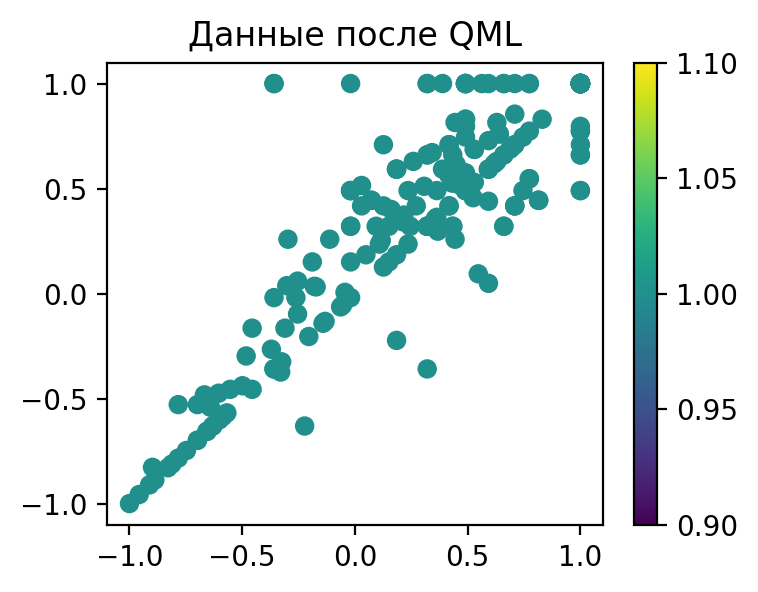

In [267]:
gram_mat_3_cos_02 = gram_mat
preds_3_cos_02 = model.predict(X=gram_mat_3_cos_02)

plt.figure(figsize=(4, 3))
cb = plt.scatter(x_samples[:, 0], x_samples[:, 1], c=preds_3_cos_02)
plt.colorbar(cb)
plt.title("Данные после QML")
plt.show()

In [268]:

print(gram_mat_3_cos_02)

[[1.         0.83043982 0.90800872 ... 0.97374346 0.99604208 0.7531309 ]
 [0.83043982 1.         0.68342823 ... 0.83065964 0.79326948 0.98335602]
 [0.90800872 0.68342823 1.         ... 0.86806812 0.93773291 0.63264506]
 ...
 [0.97374346 0.83065964 0.86806812 ... 1.         0.96657712 0.7402089 ]
 [0.99604208 0.79326948 0.93773291 ... 0.96657712 1.         0.71558376]
 [0.7531309  0.98335602 0.63264506 ... 0.7402089  0.71558376 1.        ]]


In [269]:
y_samples_3_cos_02 = y_samples
from sklearn.metrics import accuracy_score
print(accuracy_score(y_samples_3_cos_02, preds_3_cos_02))

0.5761904761904761


## Для 45% совпадения комментарий-словарь - 

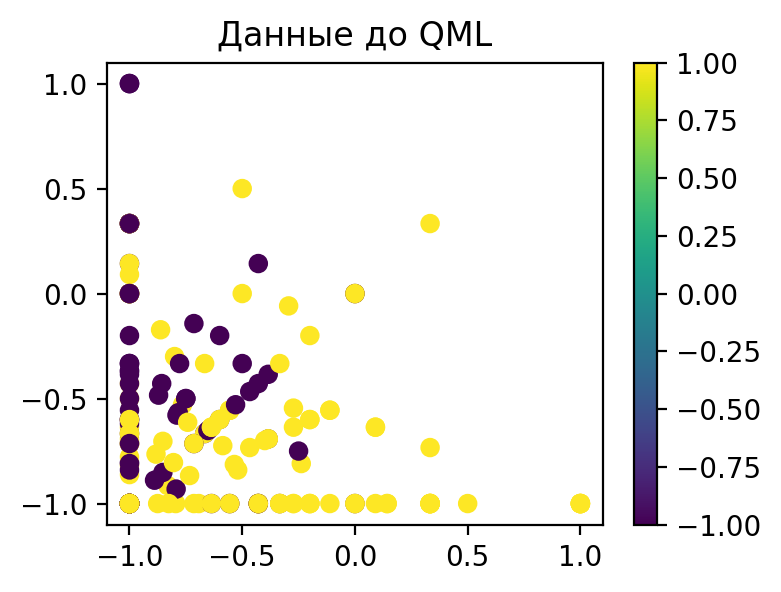

In [287]:
# x_samples[:][0] = normalize(x_samples[:][0])
# x_samples[:][1] = normalize(x_samples[:][1])


plt.figure(figsize=(4, 3))
cb = plt.scatter(x_samples[:, 0], x_samples[:, 1], c=y_samples)
plt.colorbar(cb)
plt.title("Данные до QML")
plt.show()

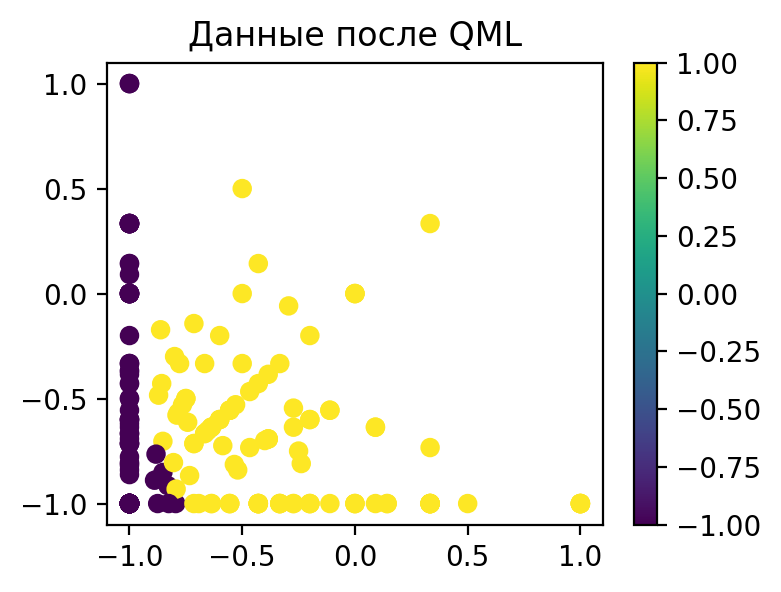

In [288]:
gram_mat_3_cos_45 = gram_mat
preds_3_cos_45 = model.predict(X=gram_mat_3_cos_45)

plt.figure(figsize=(4, 3))
cb = plt.scatter(x_samples[:, 0], x_samples[:, 1], c=preds_3_cos_45)
plt.colorbar(cb)
plt.title("Данные после QML")
plt.show()

In [289]:

print(gram_mat_3_cos_45)

[[1.         0.67207989 0.53569555 ... 0.75483273 0.93042376 0.97222821]
 [0.67207989 1.         0.55149876 ... 0.6267319  0.65565398 0.77576961]
 [0.53569555 0.55149876 1.         ... 0.39442211 0.42558854 0.6458981 ]
 ...
 [0.75483273 0.6267319  0.39442211 ... 1.         0.7991761  0.68058299]
 [0.93042376 0.65565398 0.42558854 ... 0.7991761  1.         0.87660676]
 [0.97222821 0.77576961 0.6458981  ... 0.68058299 0.87660676 1.        ]]


In [290]:
y_samples_3_cos_45 = y_samples
from sklearn.metrics import accuracy_score
print(accuracy_score(y_samples_3_cos_45, preds_3_cos_45))

0.6714285714285714


## Для 65% совпадения комментарий-словарь - 

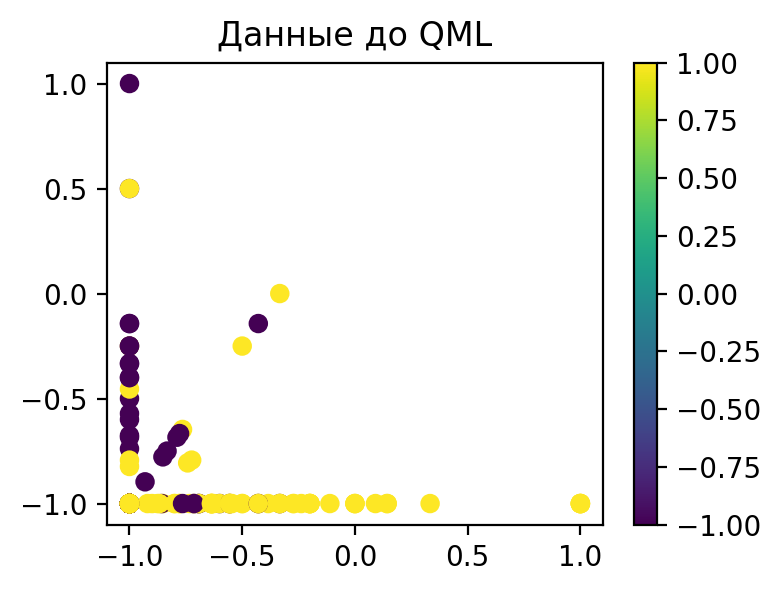

In [ ]:
# x_samples[:][0] = normalize(x_samples[:][0])
# x_samples[:][1] = normalize(x_samples[:][1])


plt.figure(figsize=(4, 3))
cb = plt.scatter(x_samples[:, 0], x_samples[:, 1], c=y_samples)
plt.colorbar(cb)
plt.title("Данные до QML")
plt.show()

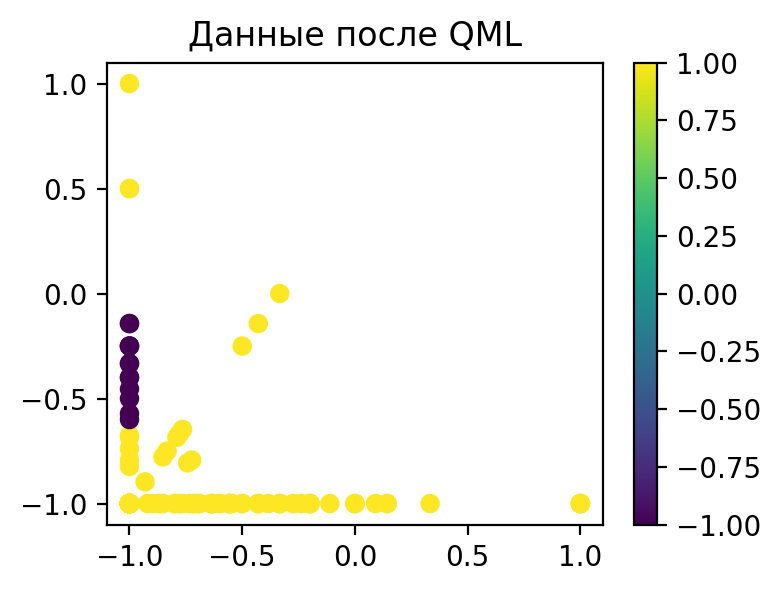

In [ ]:
gram_mat_3_cos_65 = gram_mat
preds_3_cos_65 = model.predict(X=gram_mat_3_cos_65)

plt.figure(figsize=(4, 3))
cb = plt.scatter(x_samples[:, 0], x_samples[:, 1], c=preds_3_cos_65)
plt.colorbar(cb)
plt.title("Данные после QML")
plt.show()

In [ ]:

print(gram_mat_3_cos_65)

[[1.         0.75489513 0.79332366 ... 0.90696822 0.89438424 0.95884325]
 [0.75489513 1.         0.35846041 ... 0.77996156 0.89338996 0.90000157]
 [0.79332366 0.35846041 1.         ... 0.6403252  0.54736316 0.61954664]
 ...
 [0.90696822 0.77996156 0.6403252  ... 1.         0.97115032 0.90799462]
 [0.89438424 0.89338996 0.54736316 ... 0.97115032 1.         0.95133999]
 [0.95884325 0.90000157 0.61954664 ... 0.90799462 0.95133999 1.        ]]


In [ ]:
y_samples_3_cos_65 = y_samples
from sklearn.metrics import accuracy_score
print(accuracy_score(y_samples_3_cos_65, preds_3_cos_65))

0.6190476190476191


## Для 80% совпадения комментарий-словарь - 

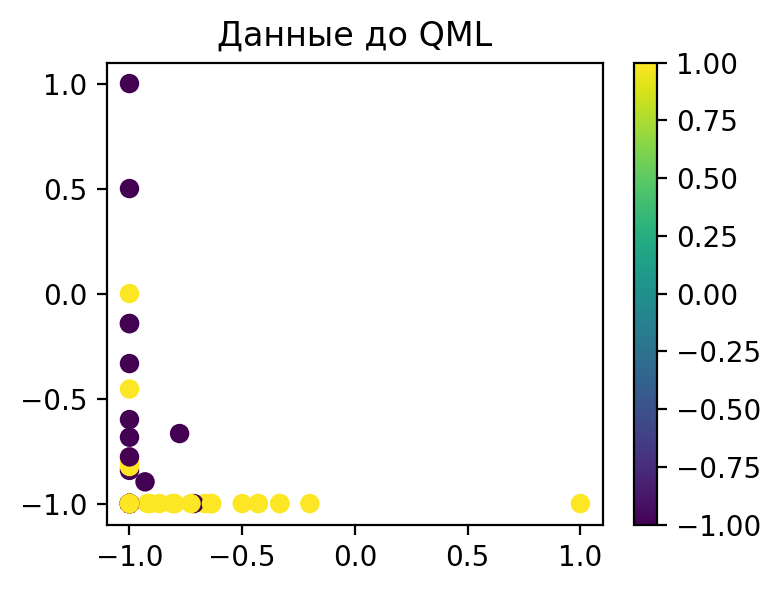

In [308]:
# x_samples[:][0] = normalize(x_samples[:][0])
# x_samples[:][1] = normalize(x_samples[:][1])


plt.figure(figsize=(4, 3))
cb = plt.scatter(x_samples[:, 0], x_samples[:, 1], c=y_samples)
plt.colorbar(cb)
plt.title("Данные до QML")
plt.show()

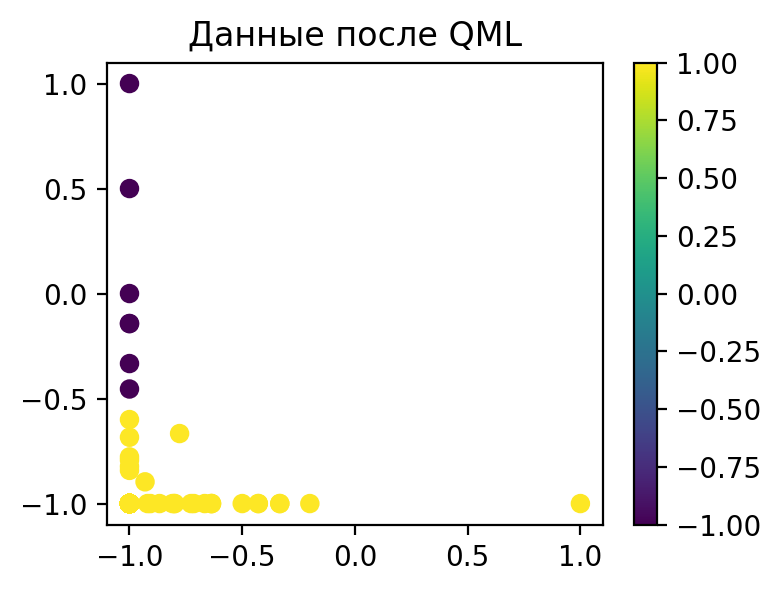

In [309]:
gram_mat_3_cos_08 = gram_mat
preds_3_cos_08 = model.predict(X=gram_mat_3_cos_08)

plt.figure(figsize=(4, 3))
cb = plt.scatter(x_samples[:, 0], x_samples[:, 1], c=preds_3_cos_08)
plt.colorbar(cb)
plt.title("Данные после QML")
plt.show()

In [310]:

print(gram_mat_3_cos_08)

[[1.         1.         1.         ... 1.         0.51320335 1.        ]
 [1.         1.         1.         ... 1.         0.51320335 1.        ]
 [1.         1.         1.         ... 1.         0.51320335 1.        ]
 ...
 [1.         1.         1.         ... 1.         0.51320335 1.        ]
 [0.51320335 0.51320335 0.51320335 ... 0.51320335 1.         0.51320335]
 [1.         1.         1.         ... 1.         0.51320335 1.        ]]


In [311]:
y_samples_3_cos_08 = y_samples
from sklearn.metrics import accuracy_score
print(accuracy_score(y_samples_3_cos_08, preds_3_cos_08))

0.5904761904761905


# Новый dataset test50.csv

# Ядро $π * cos(x[0]) * cos(x[1])$ 

## Для 65% совпадения комментарий-словарь - 

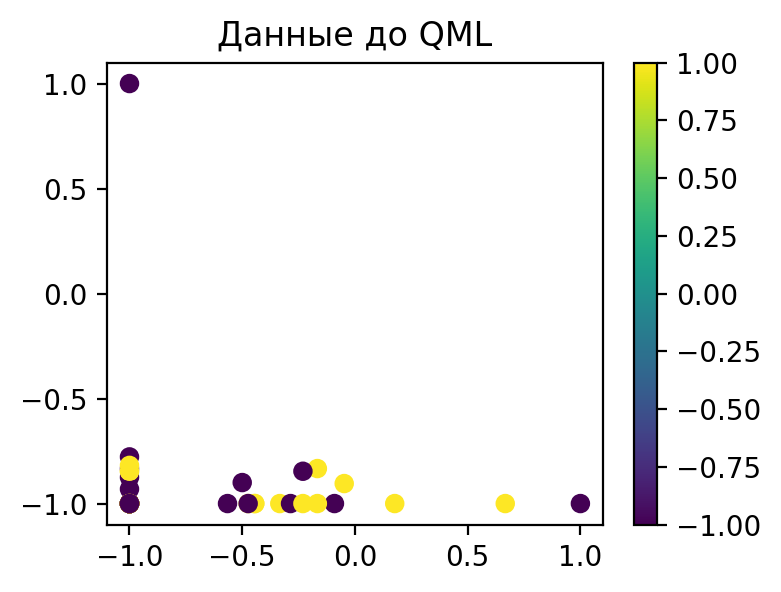

In [16]:
# x_samples[:][0] = normalize(x_samples[:][0])
# x_samples[:][1] = normalize(x_samples[:][1])


plt.figure(figsize=(4, 3))
cb = plt.scatter(x_samples[:, 0], x_samples[:, 1], c=y_samples)
plt.colorbar(cb)
plt.title("Данные до QML")
plt.show()

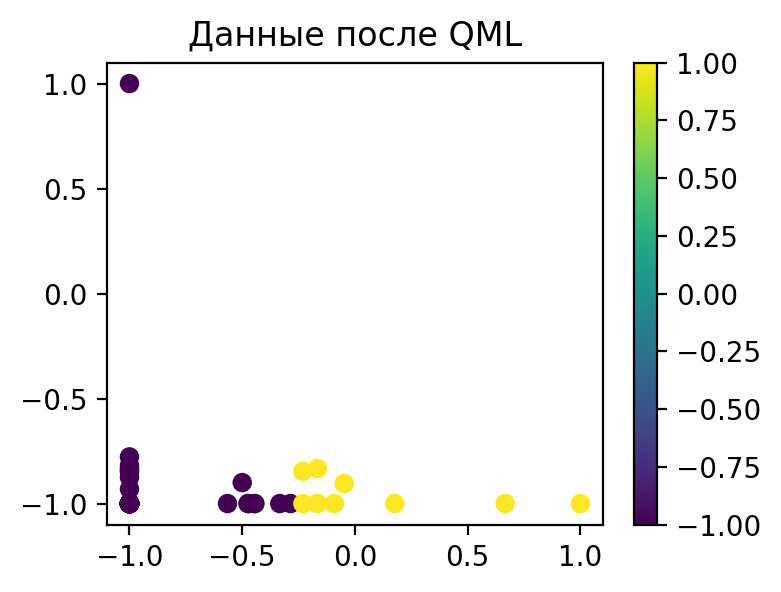

In [17]:
gram_mat_3_cos_08 = gram_mat
preds_3_cos_08 = model.predict(X=gram_mat_3_cos_08)

plt.figure(figsize=(4, 3))
cb = plt.scatter(x_samples[:, 0], x_samples[:, 1], c=preds_3_cos_08)
plt.colorbar(cb)
plt.title("Данные после QML")
plt.show()

In [18]:

print(gram_mat_3_cos_08)

[[1.         0.99643841 0.93634499 ... 0.93634499 0.93634499 0.93634499]
 [0.99643841 1.         0.95332921 ... 0.95332921 0.95332921 0.95332921]
 [0.93634499 0.95332921 1.         ... 1.         1.         1.        ]
 ...
 [0.93634499 0.95332921 1.         ... 1.         1.         1.        ]
 [0.93634499 0.95332921 1.         ... 1.         1.         1.        ]
 [0.93634499 0.95332921 1.         ... 1.         1.         1.        ]]


In [19]:
y_samples_3_cos_08 = y_samples
from sklearn.metrics import accuracy_score
print(accuracy_score(y_samples_3_cos_08, preds_3_cos_08))

0.6
